In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import os
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

INPUT_PATH = Path('../input')
OUTPUT_PATH = Path('../output')
pd.set_option('display.float_format', str)

In [2]:
%%time

transactions = pd.read_csv(INPUT_PATH / 'trxn.csv')
assets_under_management = pd.read_csv(INPUT_PATH / 'aum.csv')
balance = pd.read_csv(INPUT_PATH / 'balance.csv')
client = pd.read_csv(INPUT_PATH / 'client.csv')
campaigns = pd.read_csv(INPUT_PATH / 'com.csv')
deals = pd.read_csv(INPUT_PATH / 'deals.csv')
dict_merchant_category_code = pd.read_csv(INPUT_PATH / 'dict_mcc.csv')
payments = pd.read_csv(INPUT_PATH / 'payments.csv')
funnel = pd.read_csv(INPUT_PATH / 'funnel.csv')
appl = pd.read_csv(INPUT_PATH / 'appl.csv')

/opt/conda/lib/python3.7/site-packages/decorator.py:231: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  return caller(func, *(extras + args), **kw)


CPU times: user 7.06 s, sys: 498 ms, total: 7.55 s
Wall time: 7.55 s


In [3]:
data = funnel.copy()

In [99]:
def get_feature_total(df, col_name):
    return data['client_id'].map(df.groupby(['client_id', col_name]).size().index.get_level_values('client_id').value_counts()).fillna(0)


def get_feature_most_common(df, col_name, fill_na_value):
    return data['client_id'].map(df.groupby('client_id')[col_name].agg(lambda x: scipy.stats.mode(x)[0][0])).fillna(fill_na_value)


def get_feature_mean(df, col_name, fill_na_value):
    return data['client_id'].map(df.groupby('client_id')[col_name].mean()).fillna(fill_na_value)


def get_feature_std(df, col_name, fill_na_value):
    return data['client_id'].map(df.groupby('client_id')[col_name].std()).fillna(fill_na_value)


def get_feature_max_min(df, col_name, fill_na_value):
    return data['client_id'].map(df.groupby('client_id')[col_name].agg(lambda x: x.max() - x.min())).fillna(fill_na_value)

# Funnel

In [5]:
funnel

,client_id,sale_flg,sale_amount,contacts,feature_1,client_segment,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,region_cd
0,7513301859607023584,0,NaN,1,7,13.0,571533.0,15717.0,0.0,0.0,0.0,571852.0,472605.0,10.4,12548.0,86.0
1,9157009756404187626,0,NaN,1,3,13.0,3642369.0,94787.0,0.0,0.0,84823.0,3642369.0,3314257.0,8.9,77210.0,2.0
2,-1893104556496814867,0,NaN,1,5,16.0,352826.0,5500.0,0.0,6822.0,0.0,265893.0,204534.0,8.9,5508.0,52.0
3,6886062013213911831,0,NaN,1,4,3.0,6070615.0,40580.0,0.0,30401.0,0.0,2005731.0,1825051.0,7.9,40583.0,86.0
4,-8156468515495593794,1,138018.05000000002,1,7,14.0,3642369.0,97156.0,81488.0,0.0,160308.0,3642369.0,3314257.0,10.4,78108.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21493,4662551505651924284,0,NaN,2,3,3.0,6070615.0,97616.0,21921.0,85635.0,89802.0,4826139.0,4391391.0,7.9,97626.0,86.0
21494,-8968737688687691353,0,NaN,1,9,14.0,1821184.0,2428.0,3952.0,0.0,13938.0,92273.0,71641.0,19.9,2440.0,78.0
21495,-5799097497074119478,0,NaN,1,2,16.0,6070615.0,64991.0,0.0,13450.0,0.0,3212569.0,2923175.0,7.9,64998.0,69.0
21496,-2264802671063321355,1,43882.85000000001,2,8,4.0,2282408.0,5832.0,16185.0,0.0,82182.0,230683.0,177449.0,17.9,5845.0,59.0


In [6]:
funnel.isnull().sum()

client_id             0
sale_flg              0
sale_amount       17979
contacts              0
feature_1             0
client_segment        0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7            11
feature_8            11
feature_9            11
feature_10           11
region_cd            34
dtype: int64

In [7]:
funnel['sale_flg'].value_counts() / len(funnel)

0   0.8363103544515769
1   0.1636896455484231
Name: sale_flg, dtype: float64

In [8]:
funnel['contacts'].value_counts()

1    17361
2     3484
3      577
4       71
5        5
Name: contacts, dtype: int64

In [9]:
funnel['region_cd'].value_counts()

86.0    3131
77.0    1430
54.0    1372
78.0    1223
66.0    1001
        ... 
15.0      11
83.0       5
14.0       4
87.0       1
91.0       1
Name: region_cd, Length: 75, dtype: int64

# Transactions

In [10]:
transactions

,client_id,card_id,tran_time,tran_amt_rur,mcc_cd,merchant_cd,txn_country,txn_city,tsp_name,txn_comment_1,txn_comment_2
0,-1893104556496814867,-6909844117230568380,2019-07-01 00:00:00,6071.0,6011.0,3796217713062573289,RUS,N. NOVGOROD,MOLODEZHNYY PR. DEPO,Cash withdrawal through an ATM,NaN
1,-1893104556496814867,-6909844117230568380,2019-07-29 00:00:00,6071.0,6011.0,3796217713062573289,RUS,N. NOVGOROD,MOLODEZHNYY PR. DEPO,Cash withdrawal through an ATM,NaN
2,-1893104556496814867,-6909844117230568380,2019-08-31 00:00:00,7285.0,6011.0,3796217713062573289,RUS,N. NOVGOROD,MOLODEZHNYY PR. DEPO,Cash withdrawal through an ATM,NaN
3,6886062013213911831,6527755410945490683,2019-08-14 10:38:33,2428.0,6011.0,-774579209084196290,RUS,RADUZHNYI,TTS SITI,Cash withdrawal through an ATM,NaN
4,6886062013213911831,6527755410945490683,2019-07-17 12:27:58,6071.0,6011.0,-7735007003326589238,RUS,RADUZHNYI,ODTS AGANGRAD,Cash withdrawal through an ATM,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3035700,-3405096435133737788,-1484177776108621230,2018-09-06 07:41:17,728.0,6012.0,3967370607447365704,RUS,VISA DIRECT,VISA MONEY TRANSFER,Payment by card (bank transfer),VISA MONEY TRANSFER
3035701,5941620754379828660,-4513708287312715087,2018-12-02 08:16:48,2550.0,6012.0,3967370607447365704,RUS,VISA DIRECT,VISA MONEY TRANSFER,Payment by card (bank transfer),VISA MONEY TRANSFER
3035702,5941620754379828660,-4513708287312715087,2018-12-28 13:55:12,3642.0,6012.0,3967370607447365704,RUS,VISA DIRECT,VISA MONEY TRANSFER,Payment by card (bank transfer),VISA MONEY TRANSFER
3035703,2964514409686635938,4497627322591857070,2018-12-21 09:32:26,2792.0,6012.0,3967370607447365704,RUS,VISA DIRECT,VISA MONEY TRANSFER,Payment by card (bank transfer),VISA MONEY TRANSFER


In [11]:
transactions.isnull().sum()

client_id              0
card_id                0
tran_time              0
tran_amt_rur           0
mcc_cd               132
merchant_cd            0
txn_country            0
txn_city            5385
tsp_name            2162
txn_comment_1          0
txn_comment_2    2638786
dtype: int64

In [12]:
transactions['mcc_cd'] = transactions['mcc_cd'].fillna(-2)
transactions['txn_city'] = transactions['txn_city'].fillna('<UNK>')
transactions['tsp_name'] = transactions['tsp_name'].fillna('<UNK>')
transactions['txn_comment_2'] = transactions['txn_comment_2'].fillna('<UNK>')

In [13]:
transactions['client_id'].value_counts()

 8247514152661289191    3101
-9059132502179716006    2656
 7922361971867610498    2413
-7299536715312723669    2322
 410746725485357352     2318
                        ... 
 9042984261245798495       1
-9164745288538024239       1
-2639946325109418679       1
-3176336415532661554       1
 328258837130732479        1
Name: client_id, Length: 11236, dtype: int64

In [14]:
transactions['tran_time'].value_counts()

2019-02-28 00:00:00    5665
2019-06-02 00:00:00    3819
2019-08-14 00:00:00    3296
2019-08-28 00:00:00    3291
2019-07-24 00:00:00    3270
                       ... 
2019-05-15 13:24:30       1
2019-07-24 10:01:12       1
2019-02-07 04:46:24       1
2019-04-22 18:53:45       1
2019-06-17 10:27:57       1
Name: tran_time, Length: 2082989, dtype: int64

In [15]:
pd.to_datetime(transactions['tran_time']).min(), pd.to_datetime(transactions['tran_time']).max()

(Timestamp('2018-09-01 00:00:00'), Timestamp('2019-08-31 23:58:15'))

In [16]:
data['total_transactions'] = data['client_id'].map(transactions.groupby('client_id').size()).fillna(0)
data['total_transactions'].value_counts()

0.0       10262
2.0         135
11.0        120
12.0        114
1.0         111
          ...  
1060.0        1
1244.0        1
1146.0        1
1346.0        1
1174.0        1
Name: total_transactions, Length: 1258, dtype: int64

In [17]:
data['total_cards'] = get_feature_total(transactions, 'card_id')
data['total_cards'].value_counts()

0.0     10262
1.0      6618
2.0      2818
3.0      1130
4.0       446
5.0       155
6.0        46
7.0        13
8.0         7
9.0         2
13.0        1
Name: total_cards, dtype: int64

In [18]:
data['mean_transaction_amt'] = data['client_id'].map(transactions.groupby('client_id')['tran_amt_rur'].mean()).fillna(-1)
data['mean_transaction_amt'].value_counts()

-1.0                  10262
121.0                    46
1214.0                    8
24282.0                   6
1821.0                    6
                      ...  
10450.125                 1
1471.864406779661         1
1037.6381766381767        1
1337.5238095238096        1
49857.3                   1
Name: mean_transaction_amt, Length: 11121, dtype: int64

In [19]:
data['total_mcc_cd'] = get_feature_total(transactions, 'mcc_cd')
data['total_mcc_cd'].value_counts()

0.0     10262
2.0       683
1.0       620
3.0       546
4.0       318
        ...  
88.0        1
78.0        1
85.0        1
79.0        1
91.0        1
Name: total_mcc_cd, Length: 86, dtype: int64

In [20]:
data['total_share_mcc_cd'] = (data['total_mcc_cd'] / data['total_transactions']).fillna(0)
data['total_share_mcc_cd'].value_counts()

0.0                     10262
1.0                       229
0.5                       162
0.25                      150
0.3333333333333333        140
                        ...  
0.1018867924528302          1
0.051771117166212535        1
0.06791569086651054         1
0.04470588235294118         1
0.0821256038647343          1
Name: total_share_mcc_cd, Length: 4984, dtype: int64

In [21]:
data['most_common_mcc_cd'] = get_feature_most_common(transactions, 'mcc_cd', -1)
data['most_common_mcc_cd'].value_counts()

-1.0      10262
5411.0     5325
6011.0     2595
6536.0      844
5499.0      550
          ...  
5977.0        1
3011.0        1
7273.0        1
8011.0        1
8071.0        1
Name: most_common_mcc_cd, Length: 74, dtype: int64

In [22]:
data['total_merchant_cd'] = get_feature_total(transactions, 'merchant_cd')
data['total_merchant_cd'].value_counts()

0.0      10262
3.0        689
4.0        671
2.0        641
5.0        563
         ...  
199.0        1
115.0        1
385.0        1
317.0        1
209.0        1
Name: total_merchant_cd, Length: 154, dtype: int64

In [23]:
data['total_share_merchant_cd'] = (data['total_merchant_cd'] / data['total_transactions']).fillna(0)
data['total_share_merchant_cd'].value_counts()

0.0                     10262
1.0                       213
0.5                       183
0.3333333333333333        144
0.25                      119
                        ...  
0.040955631399317405        1
0.026410564225690276        1
0.03547297297297297         1
0.08665906499429875         1
0.1446280991735537          1
Name: total_share_merchant_cd, Length: 4942, dtype: int64

In [24]:
data['most_common_merchant_cd'] = get_feature_most_common(transactions, 'merchant_cd', -1)
data['most_common_merchant_cd'].value_counts()

-1.0                      10262
3.9673706074473656e+18     9268
6.303729926858726e+18       346
3.9569210638920535e+18      202
-5.649346468447594e+18      176
                          ...  
-8.964917765656054e+17        1
-4.192612835342741e+18        1
-7.64182099647542e+18         1
-9.16373487481942e+18         1
-6.871520906596311e+18        1
Name: most_common_merchant_cd, Length: 976, dtype: int64

In [25]:
data['total_txn_city'] = get_feature_total(transactions, 'txn_city')
data['total_txn_city'].value_counts()

0.0      10262
2.0       1323
3.0       1003
1.0        983
4.0        788
         ...  
84.0         1
93.0         1
100.0        1
118.0        1
75.0         1
Name: total_txn_city, Length: 92, dtype: int64

In [26]:
data['total_share_txn_city'] = (data['total_txn_city'] / data['total_transactions']).fillna(0)
data['total_share_txn_city'].value_counts()

0.0                     10262
1.0                       165
0.5                       154
0.2                       127
0.25                      124
                        ...  
0.02113821138211382         1
0.02556818181818182         1
0.11009174311926606         1
0.035758323057953144        1
0.06623931623931624         1
Name: total_share_txn_city, Length: 4279, dtype: int64

In [27]:
data['most_common_txn_city'] = get_feature_most_common(transactions, 'txn_city', '<unknown>')
data['most_common_txn_city'].value_counts()

<unknown>        10262
MOSCOW            1819
NOVOSIBIRSK        520
SURGUT             258
KOGALYM            251
                 ...  
TUYMAZY              1
FRYAZINO             1
TRUBCHEVSK           1
KAZACHI LAGER        1
SHUMYACHI            1
Name: most_common_txn_city, Length: 1142, dtype: int64

In [28]:
data['total_tsp_name'] = get_feature_total(transactions, 'tsp_name')
data['total_tsp_name'].value_counts()

0.0      10262
2.0        477
3.0        443
1.0        378
4.0        327
         ...  
263.0        1
238.0        1
226.0        1
298.0        1
293.0        1
Name: total_tsp_name, Length: 302, dtype: int64

In [29]:
data['total_share_tsp_name'] = (data['total_tsp_name'] / data['total_transactions']).fillna(0)
data['total_share_tsp_name'].value_counts()

0.0                    10262
1.0                      263
0.5                      210
0.3333333333333333       169
0.25                     133
                       ...  
0.3522727272727273         1
0.206                      1
0.12867647058823528        1
0.17304492512479203        1
0.27842227378190254        1
Name: total_share_tsp_name, Length: 6030, dtype: int64

In [30]:
data['most_common_tsp_name'] = get_feature_most_common(transactions, 'tsp_name', '<unknown>')
data['most_common_tsp_name'].value_counts()

<unknown>             10262
OPEN.RU CARDCARD       1495
PYATEROCHKA             876
ATM                     700
WWW.OPENONLINE.RU       682
                      ...  
BAR JIGGERPONY            1
IP TADEVOSYAN RS          1
KUZBASSKII BROILER        1
MAGAZIN RADAMIR           1
EST POVOD                 1
Name: most_common_tsp_name, Length: 3477, dtype: int64

In [31]:
data['total_txn_comment_1'] = get_feature_total(transactions, 'txn_comment_1')
data['total_txn_comment_1'].value_counts()

0.0    10262
3.0     2548
4.0     2545
5.0     2161
2.0     2054
6.0     1127
1.0      714
7.0       87
Name: total_txn_comment_1, dtype: int64

In [32]:
data['most_common_txn_comment_1'] = get_feature_most_common(transactions, 'txn_comment_1', '<unknown>')
data['most_common_txn_comment_1'].value_counts()

<unknown>                          10262
Payment for goods and services      8607
Cash withdrawal through an ATM      1333
Payment by card (bank transfer)      480
Cash deposit by card                 440
Cashless transfer                    369
Cash withdrawal                        4
Return of goods / services             3
Name: most_common_txn_comment_1, dtype: int64

In [33]:
data['total_txn_comment_2'] = get_feature_total(transactions, 'txn_comment_2')
data['total_txn_comment_2'].value_counts()

0.0    10262
4.0     3785
3.0     2503
1.0     2142
2.0     2120
5.0      686
Name: total_txn_comment_2, dtype: int64

In [34]:
data['most_common_txn_comment_2'] = get_feature_most_common(transactions, 'txn_comment_2', '<unknown>')
data['most_common_txn_comment_2'].value_counts()

<UNK>                     10428
<unknown>                 10262
<manual mode>               346
Purchase payment (web)      333
Opening Online              111
VISA MONEY TRANSFER          18
Name: most_common_txn_comment_2, dtype: int64

# assets_under_management

In [35]:
assets_under_management

,client_id,month_end_dt,balance_rur_amt,product_code
0,-1893104556496814867,2018-12-31,44.0,Current accounts
1,-1893104556496814867,2019-04-30,44.0,Current accounts
2,-1893104556496814867,2019-06-30,6115.0,Current accounts
3,-1893104556496814867,2019-07-31,6115.0,Current accounts
4,-1893104556496814867,2019-08-31,45685.0,Current accounts
...,...,...,...,...
117387,261276908856610555,2019-05-31,60706.0,ILI
117388,261276908856610555,2019-07-31,60706.0,ILI
117389,261276908856610555,2019-06-30,60706.0,ILI
117390,261276908856610555,2019-08-31,60706.0,ILI


In [103]:
assets_under_management.isnull().sum()

client_id          0
month_end_dt       0
balance_rur_amt    0
product_code       0
dtype: int64

In [44]:
data['total_aum'] = data['client_id'].map(assets_under_management.groupby('client_id').size()).fillna(0)
data['total_aum'].value_counts()

0.0     8873
10.0    7538
9.0     1417
6.0      485
7.0      445
8.0      380
4.0      347
3.0      332
5.0      302
1.0      287
20.0     261
2.0      247
19.0      75
13.0      72
12.0      66
11.0      66
18.0      48
16.0      48
14.0      40
30.0      39
17.0      28
15.0      19
21.0      16
29.0      11
28.0       8
27.0       7
24.0       7
40.0       6
23.0       6
22.0       5
26.0       4
37.0       3
31.0       2
38.0       2
34.0       2
45.0       1
36.0       1
39.0       1
32.0       1
Name: total_aum, dtype: int64

In [40]:
data['most_common_product_code'] = get_feature_most_common(assets_under_management, 'product_code', '<unknown>')
data['most_common_product_code'].value_counts()

Current accounts    12159
<unknown>            8873
Time account          233
Broker                154
NSJ                    44
UK                     29
ILI                     6
Name: most_common_product_code, dtype: int64

In [41]:
data['total_product_code'] = get_feature_total(assets_under_management, 'product_code')
data['total_product_code'].value_counts()

1.0    11694
0.0     8873
2.0      785
3.0      121
4.0       23
5.0        2
Name: total_product_code, dtype: int64

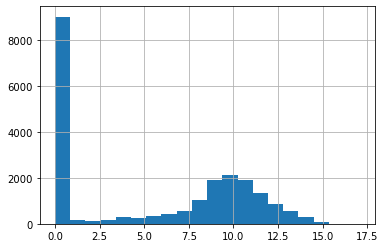

In [55]:
data['mean_balance_rur_amt'] = data['client_id'].map(assets_under_management.groupby('client_id')['balance_rur_amt'].mean()).fillna(-1)
np.log1p(data['mean_balance_rur_amt'] + 1).hist(bins=20)
plt.show()

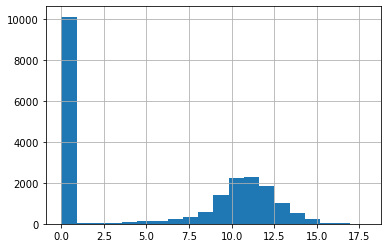

In [58]:
data['std_balance_rur_amt'] = data['client_id'].map(assets_under_management.groupby('client_id')['balance_rur_amt'].agg(lambda x: x.std())).fillna(-1)
np.log1p(data['max_min_balance_rur_amt'] + 1).hist(bins=20)
plt.show()

# Balance

In [60]:
balance

,client_id,crncy_cd,eop_bal_sum_rur,min_bal_sum_rur,max_bal_sum_rur,avg_bal_sum_rur,month_end_dt,prod_cat_name,prod_group_name
0,7513301859607023584,810.0,0.0,0.0,0.0,0.0,2018-09-30,CURRENT ACCOUNTS,Cash on demand
1,7513301859607023584,810.0,0.0,0.0,0.0,0.0,2018-09-30,CURRENT ACCOUNTS,Cash on demand
2,7513301859607023584,810.0,0.0,0.0,0.0,0.0,2018-09-30,CURRENT ACCOUNTS,Cash on demand
3,7513301859607023584,810.0,0.0,0.0,0.0,0.0,2018-09-30,CURRENT ACCOUNTS,Cash on demand
4,7513301859607023584,810.0,0.0,0.0,0.0,0.0,2018-09-30,CURRENT ACCOUNTS,Cash on demand
...,...,...,...,...,...,...,...,...,...
1194679,8771660346321577665,810.0,0.0,0.0,0.0,0.0,2019-04-30,CAR LOANS,Car loans
1194680,8771660346321577665,810.0,0.0,0.0,0.0,0.0,2019-05-31,CAR LOANS,Car loans
1194681,8771660346321577665,810.0,0.0,0.0,0.0,0.0,2019-06-30,CAR LOANS,Car loans
1194682,8771660346321577665,810.0,0.0,0.0,0.0,0.0,2019-07-31,CAR LOANS,Car loans


In [102]:
balance.isnull().sum()

client_id              0
crncy_cd             888
eop_bal_sum_rur        0
min_bal_sum_rur        0
max_bal_sum_rur        0
avg_bal_sum_rur        0
month_end_dt           0
prod_cat_name       1890
prod_group_name    96080
dtype: int64

In [104]:
balance['crncy_cd'] = balance['crncy_cd'].fillna(-2)
balance['prod_cat_name'] = balance['prod_cat_name'].fillna('<UNK>')
balance['prod_group_name'] = balance['prod_group_name'].fillna('<UNK>')

In [105]:
balance['client_id'].value_counts()

 3343956271377825812    10670
 3841649174837982870     5865
 3097202502652151275     5493
 280369242567491063      5238
-8357225692204604992     4352
                        ...  
 3136503123480904931        2
 5325453404912495978        1
 8795681619024426036        1
 4947730604314534183        1
-3310635477253838557        1
Name: client_id, Length: 18625, dtype: int64

In [106]:
data['total_balance'] = data['client_id'].map(balance.groupby('client_id').size()).fillna(0)
data['total_balance'].value_counts()

12.0      3379
0.0       2873
24.0      2232
36.0      1484
48.0      1004
          ... 
3393.0       1
350.0        1
503.0        1
610.0        1
1056.0       1
Name: total_balance, Length: 522, dtype: int64

In [107]:
data['total_crncy_cd'] = get_feature_total(balance, 'crncy_cd')
data['total_crncy_cd'].value_counts()

1.0    17355
0.0     2873
2.0      867
3.0      343
4.0       57
5.0        2
8.0        1
Name: total_crncy_cd, dtype: int64

In [108]:
data['most_common_crncy_cd'] = get_feature_most_common(balance, 'crncy_cd', -1)
data['most_common_crncy_cd'].value_counts()

810.0    18428
-1.0      2873
840.0      140
978.0       51
-2.0         3
578.0        1
392.0        1
500.0        1
Name: most_common_crncy_cd, dtype: int64

In [109]:
data['total_eop_bal_sum_rur'] = get_feature_total(balance, 'eop_bal_sum_rur')
data['total_eop_bal_sum_rur'].value_counts()

1.0     7074
0.0     2873
2.0      782
4.0      650
7.0      636
        ... 
73.0       1
81.0       1
64.0       1
90.0       1
75.0       1
Name: total_eop_bal_sum_rur, Length: 78, dtype: int64

In [110]:
data['total_share_eop_bal_sum_rur'] = (data['total_eop_bal_sum_rur'] / data['total_balance']).fillna(0)
data['total_share_eop_bal_sum_rur'].value_counts()

0.0                     2873
0.08333333333333333     2379
0.041666666666666664    1548
0.027777777777777776     813
0.020833333333333332     511
                        ... 
0.06265060240963856        1
0.004464285714285714       1
0.05619834710743802        1
0.21714285714285714        1
0.14754098360655737        1
Name: total_share_eop_bal_sum_rur, Length: 2405, dtype: int64

In [111]:
data['mean_eop_bal_sum_rur'] = get_feature_mean(balance, 'eop_bal_sum_rur', -9999)
data['mean_eop_bal_sum_rur'].value_counts()

0.0                    7049
-9999.0                2873
1.0                      50
0.25                     44
0.5                      39
                       ... 
-143.752                  1
-25.697142857142858       1
72.41666666666667         1
-30.285714285714285       1
-36.0462962962963         1
Name: mean_eop_bal_sum_rur, Length: 8515, dtype: int64

In [112]:
data['total_min_bal_sum_rur'] = get_feature_total(balance, 'min_bal_sum_rur')
data['total_min_bal_sum_rur'].value_counts()

1.0     7866
0.0     2873
2.0     1415
3.0      929
4.0      722
        ... 
68.0       1
71.0       1
70.0       1
79.0       1
75.0       1
Name: total_min_bal_sum_rur, Length: 75, dtype: int64

In [113]:
data['mean_min_bal_sum_rur'] = get_feature_mean(balance, 'min_bal_sum_rur', -9999)
data['mean_min_bal_sum_rur'].value_counts()

0.0                    7838
-9999.0                2873
0.08333333333333333     110
0.16666666666666666      88
0.25                     79
                       ... 
-14.479166666666666       1
-407.5                    1
134.59259259259258        1
-31.177083333333332       1
-11.175                   1
Name: mean_min_bal_sum_rur, Length: 7836, dtype: int64

In [114]:
data['total_max_bal_sum_rur'] = get_feature_total(balance, 'max_bal_sum_rur')
data['total_max_bal_sum_rur'].value_counts()

1.0      6736
0.0      2873
12.0      758
10.0      748
11.0      740
         ... 
71.0        1
69.0        1
112.0       1
97.0        1
75.0        1
Name: total_max_bal_sum_rur, Length: 86, dtype: int64

In [115]:
data['mean_max_bal_sum_rur'] = get_feature_mean(balance, 'max_bal_sum_rur', -9999)
data['mean_max_bal_sum_rur'].value_counts()

0.0                    6707
-9999.0                2873
1.0                      32
3.0                      24
2.0                      21
                       ... 
29.875370919881306        1
-7.869565217391305        1
-20.142857142857142       1
16.90909090909091         1
-20.554347826086957       1
Name: mean_max_bal_sum_rur, Length: 9243, dtype: int64

In [116]:
data['total_avg_bal_sum_rur'] = get_feature_total(balance, 'avg_bal_sum_rur')
data['total_avg_bal_sum_rur'].value_counts()

1.0      6775
0.0      2873
9.0       646
8.0       630
10.0      615
         ... 
93.0        1
92.0        1
79.0        1
102.0       1
75.0        1
Name: total_avg_bal_sum_rur, Length: 85, dtype: int64

In [117]:
data['mean_avg_bal_sum_rur'] = get_feature_mean(balance, 'avg_bal_sum_rur', -9999)
data['mean_avg_bal_sum_rur'].value_counts()

0.0                    6746
-9999.0                2873
1.0                      55
2.0                      52
0.3333333333333333       39
                       ... 
-1.879120879120879        1
-168.45833333333334       1
-59.77777777777778        1
-116.32142857142857       1
7.248484848484848         1
Name: mean_avg_bal_sum_rur, Length: 8578, dtype: int64

In [118]:
data['std_avg_bal_sum_rur'] = get_feature_std(balance, 'avg_bal_sum_rur', -9999)
data['std_avg_bal_sum_rur'].value_counts()

0.0                   6771
-9999.0               2877
0.5032362797401965      10
0.2886751345948129       9
1.4142135623730951       9
                      ... 
695.306337677527         1
291.3165327085645        1
64.3157575300693         1
67.0076199156526         1
61.36711084847507        1
Name: std_avg_bal_sum_rur, Length: 11395, dtype: int64

In [119]:
data['max_min_avg_bal_sum_rur'] = get_feature_max_min(balance, 'avg_bal_sum_rur', -999999)
data['max_min_avg_bal_sum_rur'].value_counts()

0.0          6775
-999999.0    2873
1.0           273
4.0           209
3.0           194
             ... 
3430.0          1
1255.0          1
3969.0          1
2478.0          1
2150.0          1
Name: max_min_avg_bal_sum_rur, Length: 2418, dtype: int64

In [120]:
data['total_prod_cat_name'] = get_feature_total(balance, 'prod_cat_name')
data['total_prod_cat_name'].value_counts()

1.0    6758
2.0    5494
3.0    3984
0.0    2873
4.0    1720
5.0     536
6.0     111
7.0      21
8.0       1
Name: total_prod_cat_name, dtype: int64

In [121]:
data['most_common_prod_cat_name'] = get_feature_most_common(balance, 'prod_cat_name', '<unknown>')
data['most_common_prod_cat_name'].value_counts()

KN                  10338
CURRENT ACCOUNTS     4589
<unknown>            2873
SALARY CARDS         1725
DEPOSITS             1248
DEBIT CARDS           485
CREDIT CARDS          131
<UNK>                  45
CAR LOANS              30
MORTGAGE               16
TECHNICAL CARDS        15
Cash on demand          3
Name: most_common_prod_cat_name, dtype: int64

In [122]:
data['total_prod_group_name'] = get_feature_total(balance, 'prod_group_name')
data['total_prod_group_name'].value_counts()

1.0     5913
2.0     4004
3.0     3075
0.0     2873
4.0     2465
5.0     1594
6.0      943
7.0      446
8.0      140
9.0       39
10.0       6
Name: total_prod_group_name, dtype: int64

In [123]:
data['most_common_prod_group_name'] = get_feature_most_common(balance, 'prod_group_name', '<unknown>')
data['most_common_prod_group_name'].value_counts()

Cash on demand           6203
Salary cards             5620
<unknown>                2873
Debit cards              2229
<UNK>                    1959
Time deposits            1326
PILS                      584
Credit card other         490
Open_card credit card      82
Prepaid cards              37
Car loans                  31
Mortgage                   24
Credit card 120 days       24
Technical cards            16
Name: most_common_prod_group_name, dtype: int64

In [124]:
balance

,client_id,crncy_cd,eop_bal_sum_rur,min_bal_sum_rur,max_bal_sum_rur,avg_bal_sum_rur,month_end_dt,prod_cat_name,prod_group_name
0,7513301859607023584,810.0,0.0,0.0,0.0,0.0,2018-09-30,CURRENT ACCOUNTS,Cash on demand
1,7513301859607023584,810.0,0.0,0.0,0.0,0.0,2018-09-30,CURRENT ACCOUNTS,Cash on demand
2,7513301859607023584,810.0,0.0,0.0,0.0,0.0,2018-09-30,CURRENT ACCOUNTS,Cash on demand
3,7513301859607023584,810.0,0.0,0.0,0.0,0.0,2018-09-30,CURRENT ACCOUNTS,Cash on demand
4,7513301859607023584,810.0,0.0,0.0,0.0,0.0,2018-09-30,CURRENT ACCOUNTS,Cash on demand
...,...,...,...,...,...,...,...,...,...
1194679,8771660346321577665,810.0,0.0,0.0,0.0,0.0,2019-04-30,CAR LOANS,Car loans
1194680,8771660346321577665,810.0,0.0,0.0,0.0,0.0,2019-05-31,CAR LOANS,Car loans
1194681,8771660346321577665,810.0,0.0,0.0,0.0,0.0,2019-06-30,CAR LOANS,Car loans
1194682,8771660346321577665,810.0,0.0,0.0,0.0,0.0,2019-07-31,CAR LOANS,Car loans


In [125]:
balance['max_min_bal_sum_rur'] = balance['max_bal_sum_rur'] - balance['min_bal_sum_rur']
balance['max_min_bal_sum_rur'].value_counts()

0.0       986122
1.0        10262
2.0         7156
6.0         6642
3.0         6535
           ...  
721.0          1
2067.0         1
2700.0         1
2126.0         1
1824.0         1
Name: max_min_bal_sum_rur, Length: 1666, dtype: int64

# client

In [128]:
client

,client_id,gender,age,region,city,citizenship,education,job_type
0,7513301859607023584,F,33.0,0,115,RUSSIA,NaN,NaN
1,9157009756404187626,F,59.0,17,668,RUSSIA,NaN,NaN
2,-1893104556496814867,M,51.0,28,65,RUSSIA,NaN,NaN
3,6886062013213911831,F,56.0,0,40,RUSSIA,NaN,NaN
4,-8156468515495593794,F,34.0,-1,-1,RUSSIA,HIGHER_PROFESSIONAL,NaN
...,...,...,...,...,...,...,...,...
21493,4662551505651924284,M,31.0,0,14,RUSSIA,NaN,NaN
21494,-8968737688687691353,M,53.0,25,33,RUSSIA,NaN,NaN
21495,-5799097497074119478,F,57.0,12,225,RUSSIA,NaN,NaN
21496,-2264802671063321355,M,37.0,37,368,RUSSIA,MIDDLE_PROFESSIONAL,NaN


In [140]:
client = client.rename(columns={
    'gender': 'client_gender',
    'age': 'client_age',
    'region': 'client_region',
    'city': 'client_city',
    'citizenship': 'client_citizenship',
    'education': 'client_education',
    'job_type': 'client_job_type'
})

In [141]:
client['client_id'].value_counts()

 7829839803824199400    1
-6460167447593483513    1
-2704671794359580738    1
-8131884441362639877    1
 5890322905008911446    1
                       ..
-3478646164620049296    1
 9214193408971059365    1
 1257006377617108732    1
-1949312882376273523    1
 6452377182247997073    1
Name: client_id, Length: 21498, dtype: int64

In [143]:
data

,client_id,sale_flg,sale_amount,contacts,feature_1,client_segment,feature_2,feature_3,feature_4,feature_5,...,mean_eop_bal_sum_rur,mean_min_bal_sum_rur,mean_max_bal_sum_rur,mean_avg_bal_sum_rur,std_avg_bal_sum_rur,max_min_avg_bal_sum_rur,total_prod_cat_name,most_common_prod_cat_name,total_prod_group_name,most_common_prod_group_name
0,7513301859607023584,0,NaN,1,7,13.0,571533.0,15717.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,CURRENT ACCOUNTS,2.0,Cash on demand
1,9157009756404187626,0,NaN,1,3,13.0,3642369.0,94787.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,CURRENT ACCOUNTS,1.0,Cash on demand
2,-1893104556496814867,0,NaN,1,5,16.0,352826.0,5500.0,0.0,6822.0,...,4.833333333333333,0.0,6.833333333333333,2.75,7.978664732214965,28.0,1.0,SALARY CARDS,1.0,Salary cards
3,6886062013213911831,0,NaN,1,4,3.0,6070615.0,40580.0,0.0,30401.0,...,0.5729166666666666,0.026041666666666668,1.1927083333333333,0.4270833333333333,2.065649203461869,19.0,4.0,CURRENT ACCOUNTS,3.0,Cash on demand
4,-8156468515495593794,1,138018.05000000002,1,7,14.0,3642369.0,97156.0,81488.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,KN,1.0,Debit cards
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21493,4662551505651924284,0,NaN,2,3,3.0,6070615.0,97616.0,21921.0,85635.0,...,9.875,1.0,35.75,15.958333333333334,32.58764658800828,155.0,1.0,KN,2.0,Debit cards
21494,-8968737688687691353,0,NaN,1,9,14.0,1821184.0,2428.0,3952.0,0.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-999999.0,0.0,<unknown>,0.0,<unknown>
21495,-5799097497074119478,0,NaN,1,2,16.0,6070615.0,64991.0,0.0,13450.0,...,2.9166666666666665,0.0,7.0,2.0833333333333335,6.612087187091302,23.0,1.0,SALARY CARDS,1.0,Salary cards
21496,-2264802671063321355,1,43882.85000000001,2,8,4.0,2282408.0,5832.0,16185.0,0.0,...,-53.629629629629626,-55.25925925925926,-53.0,-53.74074074074074,80.10454351494609,184.0,3.0,CURRENT ACCOUNTS,3.0,Cash on demand


In [146]:
data = data.merge(client, on='client_id')
data

,client_id,sale_flg,sale_amount,contacts,feature_1,client_segment,feature_2,feature_3,feature_4,feature_5,...,most_common_prod_cat_name,total_prod_group_name,most_common_prod_group_name,client_gender,client_age,client_region,client_city,client_citizenship,client_education,client_job_type
0,7513301859607023584,0,NaN,1,7,13.0,571533.0,15717.0,0.0,0.0,...,CURRENT ACCOUNTS,2.0,Cash on demand,F,33.0,0,115,RUSSIA,NaN,NaN
1,9157009756404187626,0,NaN,1,3,13.0,3642369.0,94787.0,0.0,0.0,...,CURRENT ACCOUNTS,1.0,Cash on demand,F,59.0,17,668,RUSSIA,NaN,NaN
2,-1893104556496814867,0,NaN,1,5,16.0,352826.0,5500.0,0.0,6822.0,...,SALARY CARDS,1.0,Salary cards,M,51.0,28,65,RUSSIA,NaN,NaN
3,6886062013213911831,0,NaN,1,4,3.0,6070615.0,40580.0,0.0,30401.0,...,CURRENT ACCOUNTS,3.0,Cash on demand,F,56.0,0,40,RUSSIA,NaN,NaN
4,-8156468515495593794,1,138018.05000000002,1,7,14.0,3642369.0,97156.0,81488.0,0.0,...,KN,1.0,Debit cards,F,34.0,-1,-1,RUSSIA,HIGHER_PROFESSIONAL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21493,4662551505651924284,0,NaN,2,3,3.0,6070615.0,97616.0,21921.0,85635.0,...,KN,2.0,Debit cards,M,31.0,0,14,RUSSIA,NaN,NaN
21494,-8968737688687691353,0,NaN,1,9,14.0,1821184.0,2428.0,3952.0,0.0,...,<unknown>,0.0,<unknown>,M,53.0,25,33,RUSSIA,NaN,NaN
21495,-5799097497074119478,0,NaN,1,2,16.0,6070615.0,64991.0,0.0,13450.0,...,SALARY CARDS,1.0,Salary cards,F,57.0,12,225,RUSSIA,NaN,NaN
21496,-2264802671063321355,1,43882.85000000001,2,8,4.0,2282408.0,5832.0,16185.0,0.0,...,CURRENT ACCOUNTS,3.0,Cash on demand,M,37.0,37,368,RUSSIA,MIDDLE_PROFESSIONAL,NaN


In [152]:
client['client_region']

0         0
1        17
2        28
3         0
4        -1
         ..
21493     0
21494    25
21495    12
21496    37
21497     7
Name: client_region, Length: 21498, dtype: int64

In [158]:
data['match_client_region-region_cd'] = (data['client_region'] == data['region_cd']).astype(int)
data['match_client_region-region_cd'].value_counts()

0    21389
1      109
Name: match_client_region-region_cd, dtype: int64

In [159]:
client

,client_id,client_gender,client_age,client_region,client_city,client_citizenship,client_education,client_job_type
0,7513301859607023584,F,33.0,0,115,RUSSIA,NaN,NaN
1,9157009756404187626,F,59.0,17,668,RUSSIA,NaN,NaN
2,-1893104556496814867,M,51.0,28,65,RUSSIA,NaN,NaN
3,6886062013213911831,F,56.0,0,40,RUSSIA,NaN,NaN
4,-8156468515495593794,F,34.0,-1,-1,RUSSIA,HIGHER_PROFESSIONAL,NaN
...,...,...,...,...,...,...,...,...
21493,4662551505651924284,M,31.0,0,14,RUSSIA,NaN,NaN
21494,-8968737688687691353,M,53.0,25,33,RUSSIA,NaN,NaN
21495,-5799097497074119478,F,57.0,12,225,RUSSIA,NaN,NaN
21496,-2264802671063321355,M,37.0,37,368,RUSSIA,MIDDLE_PROFESSIONAL,NaN


In [161]:
client.isnull().sum()

client_id                 0
client_gender             3
client_age                3
client_region             0
client_city               0
client_citizenship        5
client_education      12218
client_job_type       21423
dtype: int64

In [166]:
client['client_citizenship'].value_counts()

RUSSIA     21492
UKRAINE        1
Name: client_citizenship, dtype: int64

In [167]:
client['client_education'].value_counts()

HIGHER_PROFESSIONAL            4463
MIDDLE_PROFESSIONAL            3550
FULL_GENERAL                    606
HIGHER_PROFESSIONAL_PARTIAL     258
PRIMARY_PROFESSIONAL            238
TWO_AND_MORE_HIGHER             147
SCHOLASTIC_DEGREE                18
Name: client_education, dtype: int64

In [168]:
client['client_job_type'].value_counts()

RETIRED            40
BUSINESS           15
STUDENT            15
MATERNITY_LEAVE     4
MILITARY            1
Name: client_job_type, dtype: int64

# campaigns

In [169]:
campaigns

,client_id,agr_flg,otkaz,dumaet,ring_up_flg,not_ring_up_flg,count_comm,month_end_dt,channel,prod
0,7513301859607023584,0,0,0,0,2,2,2018-12-31,CALL,Credit Card
1,7513301859607023584,0,0,0,0,2,2,2019-02-28,CALL,Credit Card
2,-8079817404148237243,0,0,0,2,0,2,2019-08-31,CALL,Credit Card
3,-8079817404148237243,0,0,0,2,0,2,2019-03-31,CALL,Credit Card
4,2897849887287086776,0,0,0,0,16,16,2019-02-28,CALL,Credit Card
...,...,...,...,...,...,...,...,...,...,...
113050,2307145364875101716,0,0,0,0,0,2,2019-05-31,SMS,Savings account
113051,-2262941530044003186,0,0,0,0,0,2,2019-05-31,SMS,Savings account
113052,-8788421051454805335,0,0,0,0,0,2,2019-05-31,SMS,Savings account
113053,-389524536695171379,0,0,0,0,0,2,2019-05-31,SMS,Savings account


In [173]:
campaigns.isnull().sum()

client_id            0
agr_flg              0
otkaz                0
dumaet               0
ring_up_flg          0
not_ring_up_flg      0
count_comm           0
month_end_dt         0
channel              0
prod               180
dtype: int64

In [216]:
campaigns['prod'] = campaigns['prod'].fillna('<UNK>')

In [171]:
campaigns['client_id'].value_counts()

-4504021236194351903    24
 1429814116916357790    24
 798911191108312800     24
-9017908488389631491    24
-3914576643966603938    24
                        ..
-5285957410178806404     1
-5160071965300690104     1
-7947294398891154362     1
 2066234112935869192     1
 1980089307273557817     1
Name: client_id, Length: 16516, dtype: int64

In [204]:
data['total_campaigns'] = data['client_id'].map(campaigns.groupby('client_id').size()).fillna(0)
data['total_campaigns'].value_counts()

0.0     4982
1.0     1756
2.0     1675
3.0     1358
4.0     1213
5.0     1196
8.0     1193
6.0     1185
10.0    1168
9.0     1127
7.0     1108
11.0     946
12.0     751
13.0     579
14.0     471
15.0     265
16.0     174
17.0     130
18.0      71
19.0      64
20.0      41
21.0      21
22.0      10
23.0       9
24.0       5
Name: total_campaigns, dtype: int64

In [175]:
campaigns['agr_flg'].value_counts()

0    111092
1      1963
Name: agr_flg, dtype: int64

In [178]:
data['total_agr_flg'] = get_feature_total(campaigns, 'agr_flg')
data['total_agr_flg'].value_counts()

1.0    14966
0.0     4982
2.0     1550
Name: total_agr_flg, dtype: int64

In [187]:
data['mean_agr_flg'] = get_feature_mean(campaigns, 'agr_flg', -1)
data['mean_agr_flg'].value_counts()

0.0                     14916
-1.0                     4982
0.125                     135
0.16666666666666666       129
0.2                       120
0.14285714285714285       120
0.1                       113
0.1111111111111111        106
0.09090909090909091       104
0.25                      104
0.5                        87
0.3333333333333333         85
0.07692307692307693        77
0.08333333333333333        73
0.07142857142857142        51
1.0                        50
0.06666666666666667        36
0.2222222222222222         24
0.0625                     21
0.15384615384615385        20
0.2857142857142857         17
0.058823529411764705       16
0.18181818181818182        16
0.4                        13
0.3                        10
0.2727272727272727         10
0.05555555555555555         7
0.13333333333333333         6
0.6666666666666666          6
0.05                        5
0.05263157894736842         5
0.1875                      5
0.42857142857142855         4
0.23076923

In [190]:
campaigns['otkaz'].value_counts()

0    98320
1    14735
Name: otkaz, dtype: int64

In [191]:
data['total_otkaz'] = get_feature_total(campaigns, 'otkaz')
data['total_otkaz'].value_counts()

2.0    8591
1.0    7925
0.0    4982
Name: total_otkaz, dtype: int64

In [195]:
data['mean_otkaz'] = get_feature_mean(campaigns, 'otkaz', -1)
data['mean_otkaz'].value_counts()

0.0                     7710
-1.0                    4982
0.25                     861
0.2                      811
0.3333333333333333       755
                        ... 
0.23809523809523808        1
0.041666666666666664       1
0.4117647058823529         1
0.8                        1
0.5555555555555556         1
Name: mean_otkaz, Length: 73, dtype: int64

In [197]:
campaigns['dumaet'].value_counts()

0    111452
1      1603
Name: dumaet, dtype: int64

In [198]:
data['total_dumaet'] = get_feature_total(campaigns, 'dumaet')
data['total_dumaet'].value_counts()

1.0    15153
0.0     4982
2.0     1363
Name: total_dumaet, dtype: int64

In [200]:
data['mean_dumaet'] = get_feature_mean(campaigns, 'dumaet', -1)
data['mean_dumaet'].value_counts()

0.0                     15134
-1.0                     4982
0.1                       126
0.09090909090909091       115
0.14285714285714285       109
0.1111111111111111        106
0.125                      97
0.16666666666666666        93
0.08333333333333333        93
0.2                        87
0.07692307692307693        82
0.07142857142857142        73
0.25                       71
0.3333333333333333         58
0.5                        43
0.06666666666666667        41
0.0625                     34
1.0                        19
0.15384615384615385        15
0.058823529411764705       13
0.05555555555555555        11
0.2857142857142857         11
0.18181818181818182        11
0.13333333333333333        11
0.2222222222222222         11
0.05263157894736842        11
0.11764705882352941         6
0.21428571428571427         6
0.05                        5
0.17647058823529413         4
0.4                         3
0.047619047619047616        3
0.3076923076923077          2
0.04347826

In [201]:
campaigns['ring_up_flg'].value_counts()

0     84556
4     24522
2      3536
8       387
6        49
12        4
16        1
Name: ring_up_flg, dtype: int64

In [202]:
data['total_ring_up_flg'] = get_feature_total(campaigns, 'ring_up_flg')
data['total_ring_up_flg'].value_counts()

2.0    9881
0.0    4982
1.0    4400
3.0    2171
4.0      63
5.0       1
Name: total_ring_up_flg, dtype: int64

In [208]:
data['most_common_ring_up_flg'] = get_feature_most_common(campaigns, 'ring_up_flg', -1)
data['most_common_ring_up_flg'].value_counts()

0.0     15687
-1.0     4982
4.0       531
2.0       294
8.0         3
6.0         1
Name: most_common_ring_up_flg, dtype: int64

In [210]:
campaigns['count_comm'].value_counts()

4     86397
2     18559
8      5863
12      888
6       563
16      269
20      164
24      129
28       93
10       44
32       36
14       27
18       14
36        4
22        3
30        1
40        1
Name: count_comm, dtype: int64

In [209]:
data['total_count_comm'] = get_feature_total(campaigns, 'count_comm')
data['total_count_comm'].value_counts()

2.0    6986
1.0    6375
0.0    4982
3.0    2789
4.0     334
5.0      30
7.0       1
6.0       1
Name: total_count_comm, dtype: int64

In [211]:
data['most_common_count_comm'] = get_feature_most_common(campaigns, 'count_comm', -1)
data['most_common_count_comm'].value_counts()

4.0     13089
-1.0     4982
2.0      3095
8.0       162
6.0        84
12.0       41
16.0       14
20.0        9
24.0        7
28.0        5
32.0        4
10.0        3
14.0        2
22.0        1
Name: most_common_count_comm, dtype: int64

In [212]:
campaigns['channel'].value_counts()

SMS      67895
CALL     36237
ATM       8846
EMAIL       77
Name: channel, dtype: int64

In [214]:
data['total_channel'] = get_feature_total(campaigns, 'channel')
data['total_channel'].value_counts()

2.0    10260
0.0     4982
1.0     3123
3.0     3121
4.0       12
Name: total_channel, dtype: int64

In [215]:
data['most_common_channel'] = get_feature_most_common(campaigns, 'channel', '<unknown>')
data['most_common_channel'].value_counts()

SMS          11734
<unknown>     4982
CALL          4070
ATM            706
EMAIL            6
Name: most_common_channel, dtype: int64

In [218]:
campaigns['prod'].value_counts()

Cash Loan                       92816
Credit Card                     15115
Debit Card                       2109
Investment bundle                1057
Mortgage                          678
Currency exchange                 518
Not applicable                    387
<UNK>                             180
Investment product                123
Savings account                    37
Integrated insurance product       30
Other                               5
Name: prod, dtype: int64

In [217]:
data['total_prod'] = get_feature_total(campaigns, 'prod')
data['total_prod'].value_counts()

1.0    8829
2.0    6832
0.0    4982
3.0     816
4.0      36
5.0       3
Name: total_prod, dtype: int64

In [219]:
data['most_common_prod'] = get_feature_most_common(campaigns, 'prod', '<unknown>')
data['most_common_prod'].value_counts()

Cash Loan                       14008
<unknown>                        4982
Credit Card                      1208
Debit Card                        690
Investment bundle                 283
Mortgage                           93
Currency exchange                  89
Not applicable                     69
<UNK>                              35
Investment product                 25
Savings account                     9
Integrated insurance product        7
Name: most_common_prod, dtype: int64